## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

Murilo Fretta José

Na análise exploratória dos dados de avaliações de filmes do site MovieLens, utilizando as bibliotecas pandas, seaborn, matplolib, scikitlearn, scipy e stats model. Além da análise exploratória para a compreensão dos padrões das avaliações, gêneros de filmes, totais de votos, notas médias, outliers e outras variáveis, foram realizados testes estatísticos para compreender o padrão de distribuição das amostras.
Foram realizados testes de comparação com as variáveis notas médias, total de votos e ano de lançamento para melhor entendimento e validação do que foi apresentado em curso.
As 20% maiores votações são notas acima de 3.99, entre 0 e 5, comédia, drama, ação, aventura e thriller foram os 5 gêneros com maior número de filmes avaliados, ou seja, com maior número de votos dados pelos espectadores. 
Ao realizar testes estatísticos, foram utilizados os gêneros de terror e aventura. Nesses testes foram avaliados a forma de distribuição (normal ou não), bem como os valores de p-value, o intervalo de confiança e analisadas as aceitações das hipóteses nulas ou alternativas quanto ao número de votos e as notas médias.
Analisas, também, foram as correlações entra as notas médias, os números totais de votos e os anos de lançamentos. Foi discorrido também quanto a validade das correlações no sentido e que nem toda correlação indica causalidade, por vezes essas correlações podem ser consideradas espúrias pelo fato de estarem sendo omitidas outras variáveis que tem relação de causa e efeito nas correlações avaliadas. 

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
filmes = pd.read_csv('/home/mfretta/Documents/Alura/DataScience/formacao-data-science-master/movies.csv')
filmes = filmes.rename(columns={'movieId': 'filmeId','title':'titulo', 'genres': 'generos'})
filmes = filmes.set_index('filmeId')


In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução
notas = pd.read_csv('/home/mfretta/Documents/Alura/DataScience/formacao-data-science-master/ratings.csv')
notas = notas.rename(columns = {'userId':'usuarioId',
             'movieId':'filmeId',
             'rating':'nota',
             'timestamp':'momento'})


In [8]:
print(notas.query('filmeId==1').nota.mean())
notas.head()


3.9209302325581397


,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução
nota_media = notas.groupby('filmeId').nota.mean().round(2)
#notas.groupby('filmeId').nota.mean()
filmes['nota_media'] = nota_media

In [10]:
filmes.head()


,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.92
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.43
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.26
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.36
5,Father of the Bride Part II (1995),Comedy,1995.0,3.07


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme
total_de_votos = notas.groupby('filmeId').nota.count()
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.92,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.43,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.26,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.36,7.0
5,Father of the Bride Part II (1995),Comedy,1995.0,3.07,49.0


In [12]:
# solução para criar a nova coluna e filtrar os filmes
filmes = filmes[filmes['total_de_votos'] >=50]
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.92,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.43,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.26,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.95,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.19,54.0


In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.92,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.43,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.26,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.95,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.19,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 0, 'Notas')

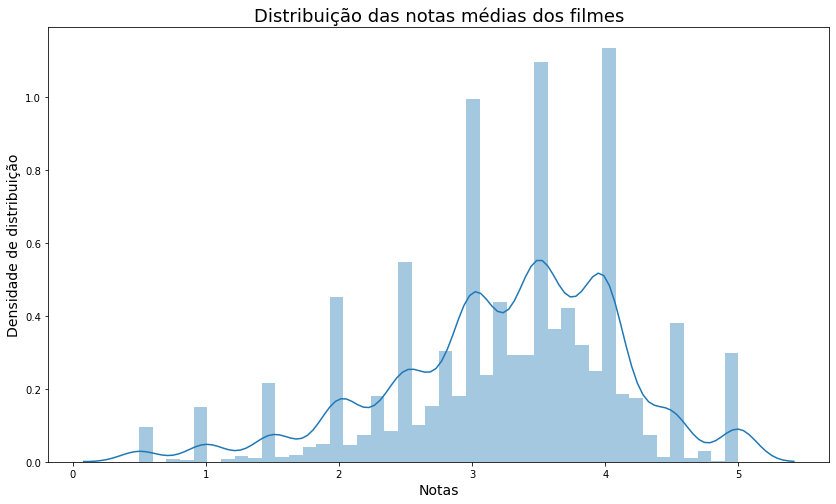

In [14]:
# solução histograma
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
ax = sns.distplot(nota_media)
ax.set_title('Distribuição das notas médias dos filmes', fontsize=18)
ax.set_ylabel('Densidade de distribuição', fontsize=14)
ax.set_xlabel('Notas', fontsize=14)

Text(0.5, 0, 'Notas')

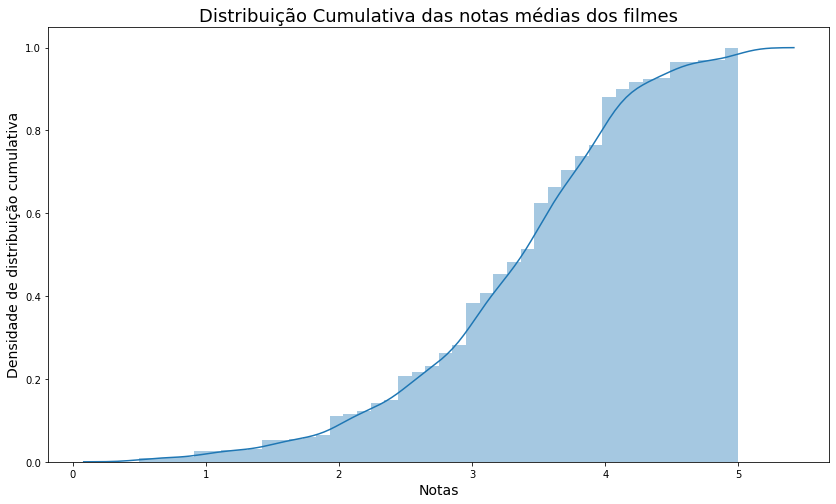

In [15]:
# solução cumulativa
plt.figure(figsize=(14,8))
ax = sns.distplot(nota_media, hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True})
ax.set_title('Distribuição Cumulativa das notas médias dos filmes', fontsize=18)
ax.set_ylabel('Densidade de distribuição cumulativa', fontsize=14)
ax.set_xlabel('Notas', fontsize=14)


## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 0, 'Notas')

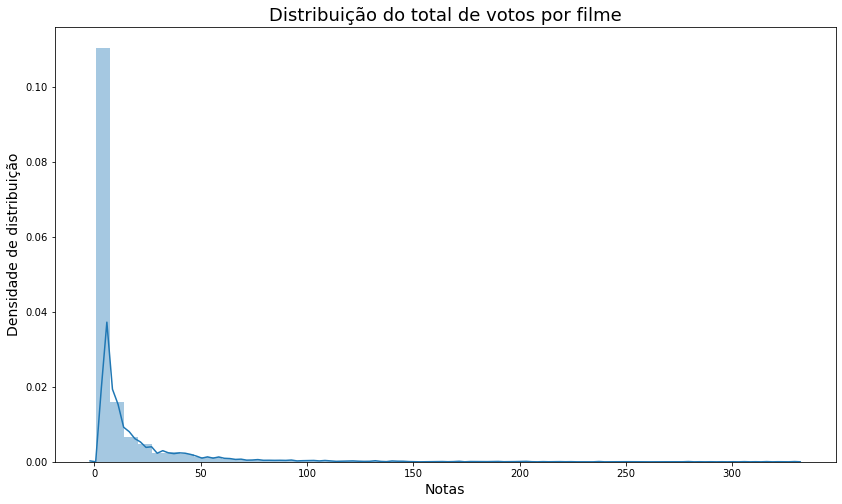

In [16]:
# solução histograma
plt.figure(figsize=(14,8))
ax = sns.distplot(total_de_votos)
ax.set_title('Distribuição do total de votos por filme', fontsize=18)
ax.set_ylabel('Densidade de distribuição', fontsize=14)
ax.set_xlabel('Notas', fontsize=14)

Text(0.5, 0, 'Notas')

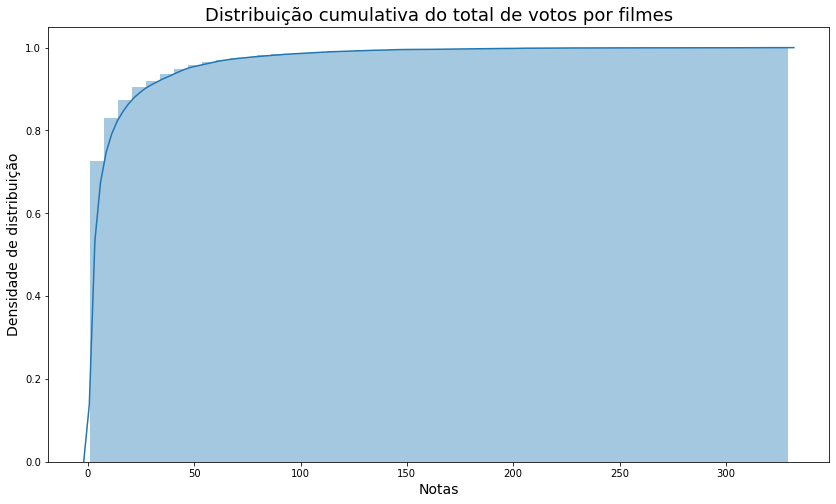

In [17]:
# solução cumulativa
plt.figure(figsize=(14,8))
ax = sns.distplot(total_de_votos,  hist_kws = {'cumulative': True}, kde_kws = {'cumulative': True})
ax.set_title('Distribuição cumulativa do total de votos por filmes', fontsize=18)
ax.set_ylabel('Densidade de distribuição', fontsize=14)
ax.set_xlabel('Notas', fontsize=14)

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [18]:
# solução
nota_limite_dos_20_porcento = filmes.query("nota_media > 0").nota_media.quantile(q=0.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.92,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.43,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.26,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.95,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.19,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

Text(0.5, 1.0, 'Filmes por gênero')

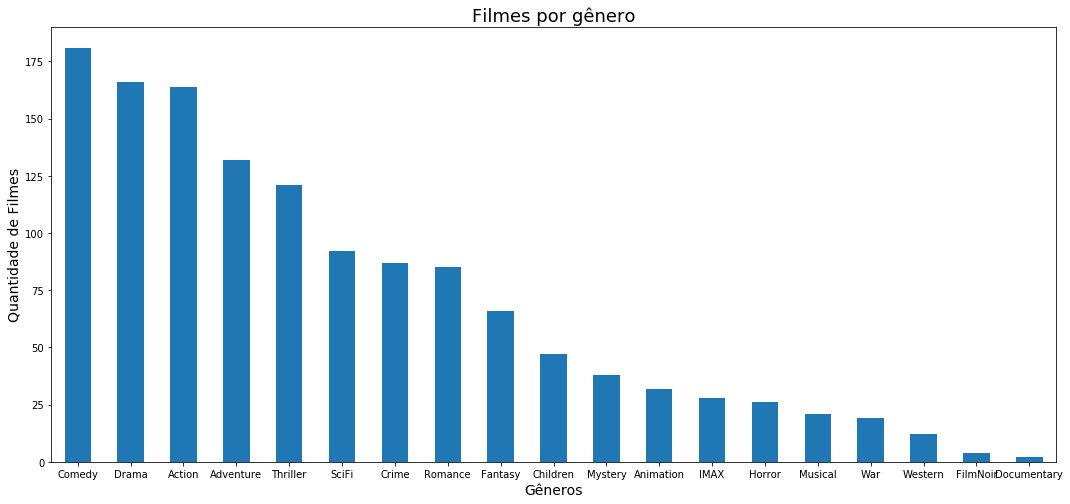

In [22]:
# solução
plt.figure(figsize=(18,8))
generos_soma = generos.sum().sort_values(ascending=False)
generos_soma.plot.bar(rot=0)
plt.xlabel('Gêneros', fontsize = 14)
plt.ylabel('Quantidade de Filmes', fontsize = 14)
plt.title('Filmes por gênero', fontsize = 18)

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [23]:
# solução
generos_soma = generos.sum()
top5_generos_em_quantidade_de_filmes = generos_soma.sort_values(ascending=False)[0:5]

In [24]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
# solucão
votos_por_genero_por_filme_ordenados = votos_por_genero_por_filme.sum().sort_values(ascending=False)
votos_por_genero_por_filme_ordenados = votos_por_genero_por_filme_ordenados.to_frame(name = 'Votos')
votos_por_genero_por_filme_ordenados.index.name = 'Gênero'
votos_por_genero_por_filme_ordenados

,Votos
Gênero,
Action,15734.0
Drama,15445.0
Comedy,15330.0
Adventure,13117.0
Thriller,11907.0
SciFi,8989.0
Crime,8649.0
Romance,7444.0
Fantasy,5993.0


Text(0.5, 1.0, 'Votos por gênero')

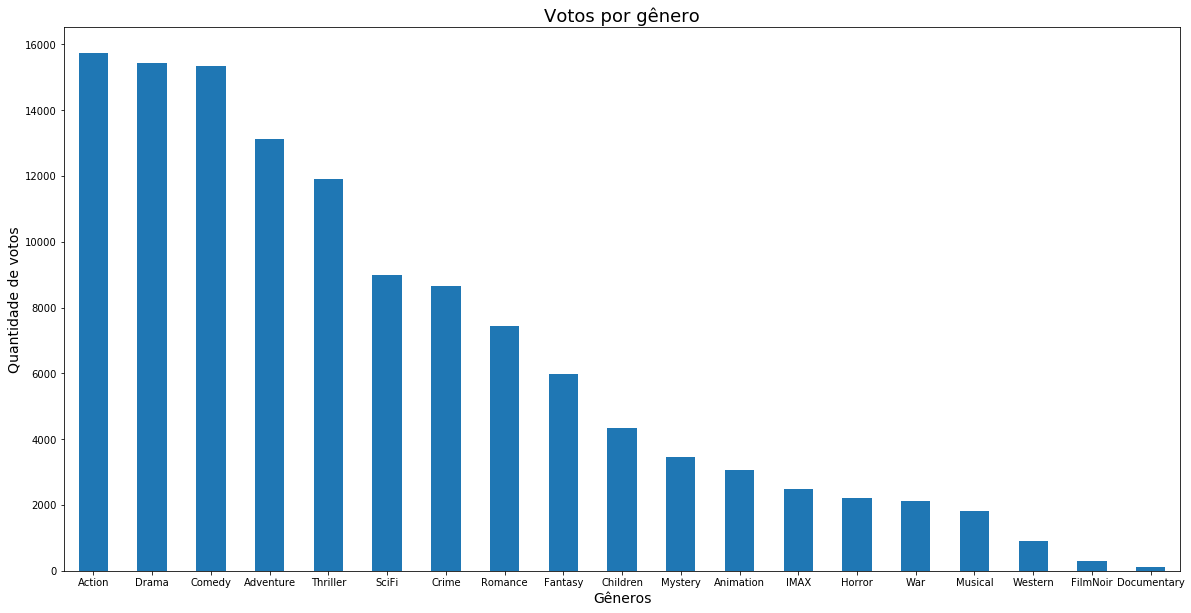

In [27]:
# solução
plt.figure(figsize=(20,10))
votos_por_genero_por_filme_ordenados['Votos'].plot.bar(rot=0)
plt.xlabel('Gêneros', fontsize = 14)
plt.ylabel('Quantidade de votos', fontsize = 14)
plt.title('Votos por gênero', fontsize = 18)


## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solucao código
comparacao = [votos_por_genero_por_filme_ordenados, generos_soma]
popularidade = pd.DataFrame(columns = ['Genero','Votos por Genero'])
popularidade['Genero'], popularidade['Votos por Genero'] = generos_soma, votos_por_genero_por_filme_ordenados 
popularidade.sort_values(by='Votos por Genero', ascending=False)
popularidade['Popularidade'] = (popularidade['Votos por Genero'] / popularidade['Genero']).round(2)
popularidade = popularidade.sort_values(by='Popularidade', ascending=False)
popularidade

,Genero,Votos por Genero,Popularidade
War,19,2113.0,111.21
Crime,87,8649.0,99.41
Adventure,132,13117.0,99.37
Thriller,121,11907.0,98.40
SciFi,92,8989.0,97.71
Action,164,15734.0,95.94
Animation,32,3066.0,95.81
Drama,166,15445.0,93.04
Children,47,4331.0,92.15
Mystery,38,3452.0,90.84


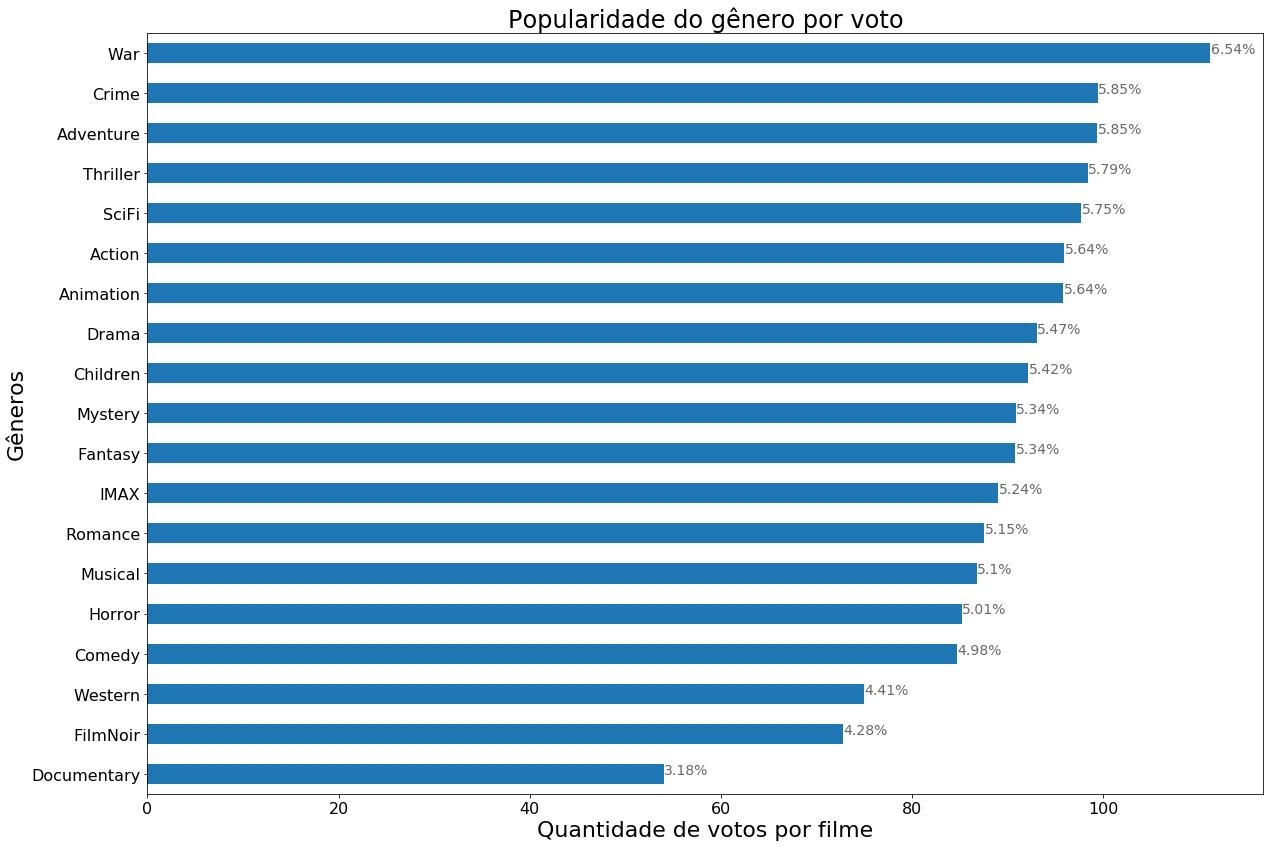

In [29]:
# solução com visualização 
fig, ax = plt.subplots(figsize=(20, 14))
#plt.figure(figsize=(20,10))
ax = popularidade['Popularidade'].plot.barh(rot=0)
ax.set_xlabel('Quantidade de votos por filme', fontsize = 22)
ax.set_ylabel('Gêneros', fontsize = 22)
ax.set_title('Popularidade do gênero por voto', fontsize = 24)
ax.tick_params(labelsize=16)
ax.invert_yaxis()
total = []

# Encontra os valores e apenda
for i in ax.patches:
    total.append(i.get_width())

# Coloca os valores em barras para cada evento
total = sum(total)
for i in ax.patches:
    # Coloca as percentagens de cada tipo de ocorrência
    ax.text(i.get_width()+.05, i.get_y()+.25, \
        str(round((i.get_width()/total)*100, 2))+'%', fontsize=14, color='dimgrey')


## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    Os gêneros War e Action representam o 1° e o 6° lugar em termos de popularidade. São filmes que obtiveram bastantes votos. Apesar de os filmes de gênero War terem como resultado a maior popularidade, a quantidade de filmes desse tipo de gênero, 19 filmes, é quase 10x menor que o número de filmes do tipo Action (164 filmes) e o número de votos do filme de gênero War (2113) é 7x menor que o número de votos do gênero Action (15734). Conclui-se que a amostra de filmes do gênero War é bem menor que a de gênero Action, o que faz com que poucos votos para o gênero tenha uma sensibilidade maior que os de filme Action.  
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0, 0.5, 'Distribuição de total de votos')

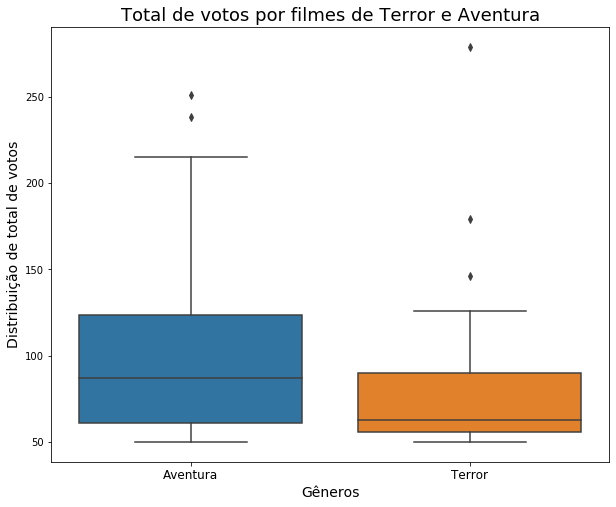

In [30]:
# solução:
adv = filmes.query('Adventure == 1')['total_de_votos']
horror = filmes.query('Horror == 1')['total_de_votos']
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(data = [adv, horror])
labels = ['Aventura','Terror']
ax.set_title('Total de votos por filmes de Terror e Aventura', fontsize=18)
ax.set_xticklabels(labels, fontsize=12)
ax.set_xlabel('Gêneros', fontsize=14)
ax.set_ylabel('Distribuição de total de votos', fontsize=14)


## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

Text(0.5, 0, 'Distribuição de total de votos')

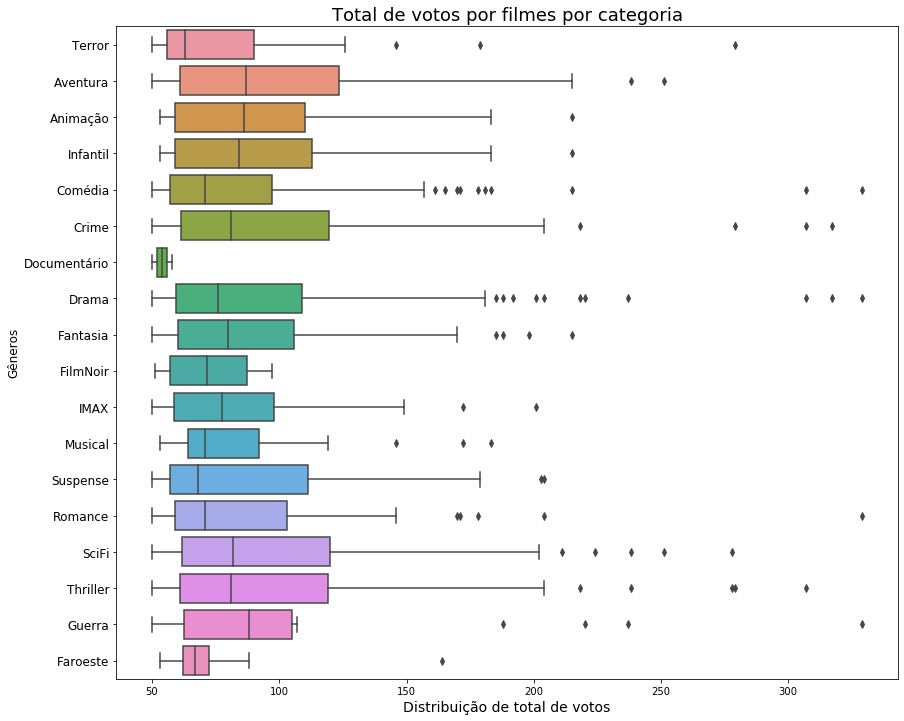

In [31]:
generos.columns
['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'],
horror = filmes.query('Horror > 0')['total_de_votos']
adv = filmes.query('Adventure > 0')['total_de_votos']
anim = filmes.query('Animation > 0')['total_de_votos']
child = filmes.query('Children > 0')['total_de_votos']
comed = filmes.query('Comedy > 0')['total_de_votos']
crime = filmes.query('Crime > 0')['total_de_votos']
docum = filmes.query('Documentary > 0')['total_de_votos']
drama = filmes.query('Drama > 0')['total_de_votos']
fant = filmes.query('Fantasy > 0')['total_de_votos']
filmnoir = filmes.query('FilmNoir > 0')['total_de_votos']
imax = filmes.query('IMAX > 0')['total_de_votos']
music = filmes.query('Musical > 0')['total_de_votos']
myst = filmes.query('Mystery > 0')['total_de_votos']
romanc = filmes.query('Romance > 0')['total_de_votos']
scifi = filmes.query('SciFi > 0')['total_de_votos']
thril = filmes.query('Thriller > 0')['total_de_votos']
war = filmes.query('War > 0')['total_de_votos']
west = filmes.query('Western > 0')['total_de_votos']

fig, ax = plt.subplots(figsize=(14, 12))
ax = sns.boxplot(data = [horror, adv, anim, child, comed, crime, docum, drama, fant,
                        filmnoir, imax, music, myst, romanc, scifi, thril, war, west], orient='h')
labels = ['Terror', 'Aventura', 'Animação', 'Infantil', 'Comédia','Crime','Documentário','Drama',
         'Fantasia', 'FilmNoir','IMAX','Musical','Suspense','Romance', 'SciFi','Thriller',
         'Guerra','Faroeste']
ax.set_title('Total de votos por filmes por categoria', fontsize=18)
ax.set_yticklabels(labels, fontsize=12)
ax.set_ylabel('Gêneros', fontsize=12)
ax.set_xlabel('Distribuição de total de votos', fontsize=14)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    
Apesar de o gênero Horror (Terror) apresentar um outlier com maior valor de total de votos, os filmes do gênero Adventure (Aventura) apresenta valores totais de votos, em geral, maior, a mediana dos votos totais dos filmes apresentam uma tendência maior, bem como a popularidade dos filmes de aventura também maior. Para a questão de criar um filme com maior chance de faturamento, o indicativo seria para o gênero Adventure (Aventura).

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 0, 'Votos por filme Aventura')

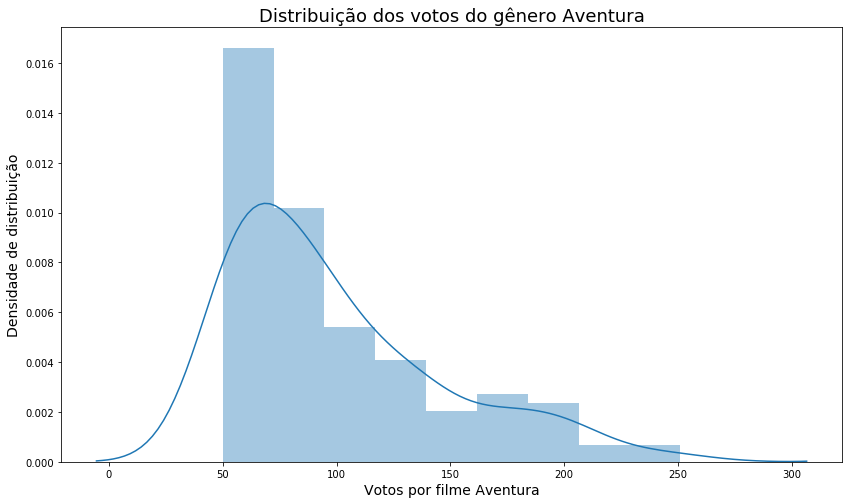

In [32]:
# solucao histograma de aventura
plt.figure(figsize=(14,8))
ax = sns.distplot(adv)
ax.set_title('Distribuição dos votos do gênero Aventura', fontsize=18)
ax.set_ylabel('Densidade de distribuição', fontsize=14)
ax.set_xlabel('Votos por filme Aventura', fontsize=14)

Text(0.5, 0, 'Votos por filme Horror (Terror)')

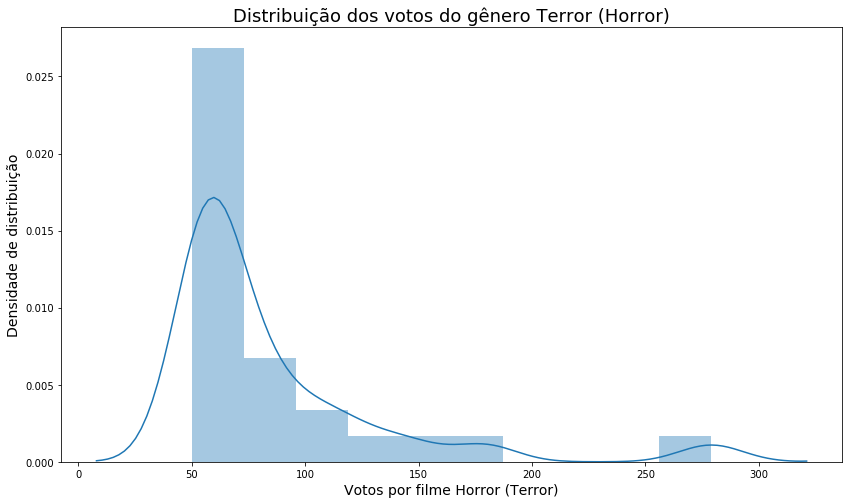

In [33]:
# solucao histograma de horror
plt.figure(figsize=(14,8))
ax = sns.distplot(horror)
ax.set_title('Distribuição dos votos do gênero Terror (Horror)', fontsize=18)
ax.set_ylabel('Densidade de distribuição', fontsize=14)
ax.set_xlabel('Votos por filme Horror (Terror)', fontsize=14)

In [34]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest
stats_adv, p_adv = normaltest(adv)

stats_adv, p_horror = normaltest(horror)
print('O valor do p-value para o filme aventura é {}'.format(p_adv.round(10)))
print('O valor do p-value para o filme terror é {}'.format(p_horror.round(10)))



O valor do p-value para o filme aventura é 5.9879e-06
O valor do p-value para o filme terror é 1.279e-07


In [35]:
# solução com o teste desejado
#Realização de teste não paramétrico para a distribuição de votos totais dos gêneros.

from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import CompareMeans

descr_votos_adv = DescrStatsW(adv)
descr_votos_horror = DescrStatsW(horror)

comparacao = descr_votos_adv.get_compare(descr_votos_horror)
descrição_adv = DescrStatsW(adv)
descrição_horror = DescrStatsW(horror)

print(descrição_adv.tconfint_mean())
print(descrição_horror.tconfint_mean())

print(comparacao.summary())

from scipy.stats import ranksums
ranksums_ = ranksums(adv, horror)
ranksums_

(91.27805593835195, 107.4643683040723)
(64.56335710156513, 105.82125828305026)
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     14.1789     10.230      1.386      0.168      -6.028      34.386


RanksumsResult(statistic=1.9789320045004148, pvalue=0.04782366231999856)

### Solução (explique sua conclusão):
Para conforme o teste realizado com o normaltest da biblioteca scipy, ambos os testes para os gêneros em questão apresentam valores (p-value) muito menores qu 0.05, logo de forma a rejeitar a hipótese nula (H0), ou seja, descarta-se a hipótese de que os dados são provenientes de uma distribuição normal.

Aplicados, portanto, os testes não-paramétricos, obteve-se os valores de intervalos de confiança das duas distribuições:

Aventura = (91.27805593835195, 107.4643683040723)

Terror = (64.56335710156513, 105.82125828305026)

Aplicou-se também o método de comparação das médias com o DescStatsW e observa-se um range dos intervalos de [-6.028 e 34.386] e um p-value = 0.168 indicando, portanto, a aceitação da hipótese nula de que não há diferença significante das médias.

Logo, utilizando o ranksums para verificar o teste de Wilcoxon das duas amostras, obteve-se um valor de p-value = 0.04782366231999856 de tal forma que aceita-se a hipótese nula e indica que os dados do gênero Aventura e Terror foram desenhados das mesma distribuição que não normal.



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0, 0.5, 'Distribuição das notas médias')

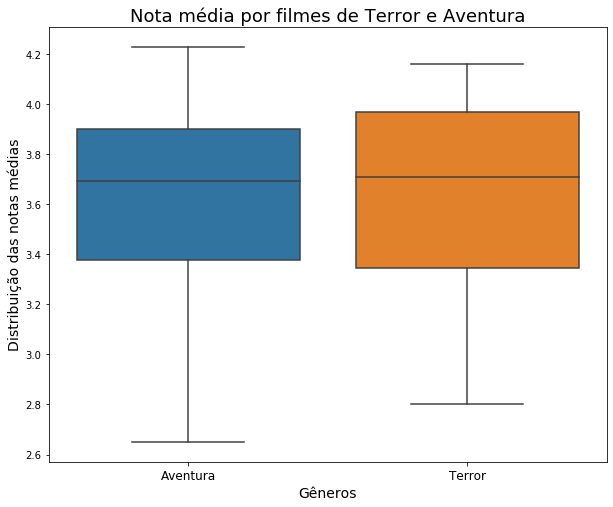

In [36]:
# solução:
adv_med = filmes.query('Adventure == 1')['nota_media']
horror_med = filmes.query('Horror == 1')['nota_media']
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(data = [adv_med, horror_med])
labels = ['Aventura','Terror']
ax.set_title('Nota média por filmes de Terror e Aventura', fontsize=18)
ax.set_xticklabels(labels, fontsize=12)
ax.set_xlabel('Gêneros', fontsize=14)
ax.set_ylabel('Distribuição das notas médias', fontsize=14)


## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
Apesar de os filmes de Terror(3.71) apresenta uma mediana maior que os filmes de Aventura (3.69), os filmes de Aventura (4.23) apresentam valor máximo de nota média do filme maior que a nota máxima do filme de genero Terror (4.16), bem como uma média maior da nota dos filmes de Aventura (3.6155) contra os filmes de Terror (3.6107).

Portanto, pelos dados o gênero do filme escolhido seria de Aventura.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 0, 'Notas médias por filme Aventura')

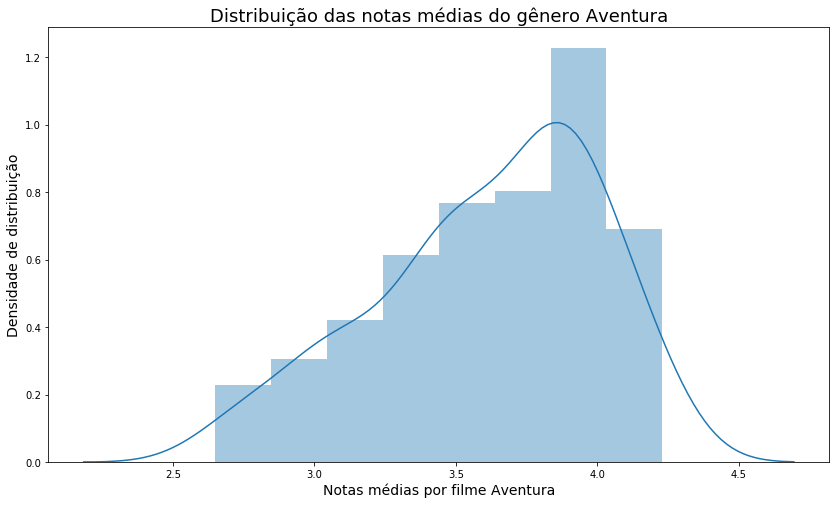

In [37]:
# solucao histograma de aventura
plt.figure(figsize=(14,8))
ax = sns.distplot(adv_med)
ax.set_title('Distribuição das notas médias do gênero Aventura', fontsize=18)
ax.set_ylabel('Densidade de distribuição', fontsize=14)
ax.set_xlabel('Notas médias por filme Aventura', fontsize=14)

Text(0.5, 0, 'Notas médias por filme Aventura')

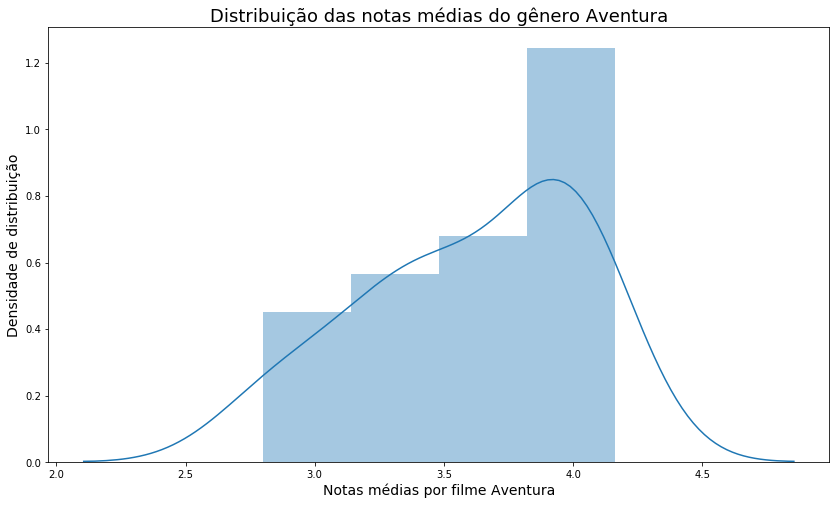

In [38]:
# solucao histograma de horror
plt.figure(figsize=(14,8))
ax = sns.distplot(horror_med)
ax.set_title('Distribuição das notas médias do gênero Aventura', fontsize=18)
ax.set_ylabel('Densidade de distribuição', fontsize=14)
ax.set_xlabel('Notas médias por filme Aventura', fontsize=14)

In [39]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest
stats_adv, p_adv_med = normaltest(adv_med)

stats_adv_med, p_horror_med = normaltest(horror_med)
print('O valor do p-value para o filme aventura é {}'.format(p_adv_med.round(10)))
print('O valor do p-value para o filme terror é {}'.format(p_horror_med.round(10)))




O valor do p-value para o filme aventura é 0.0129231759
O valor do p-value para o filme terror é 0.2109771516


In [40]:
# solução com o teste desejado
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import CompareMeans

descr_votos_adv_med = DescrStatsW(adv_med)
descr_votos_horror_med = DescrStatsW(horror)

comparacao_med = descr_votos_adv_med.get_compare(descr_votos_horror_med)
descrição_adv_med = DescrStatsW(adv_med)
descrição_horror_med = DescrStatsW(horror_med)

print(descrição_adv_med.tconfint_mean())
print(descrição_horror_med.tconfint_mean())

print(comparacao_med.summary())

from scipy.stats import ranksums
ranksums_med = ranksums(adv_med, horror_med)
ranksums_med

(3.547985947801346, 3.6830746582592604)
(3.4414975468586593, 3.780040914679803)
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1    -81.5768      4.388    -18.593      0.000     -90.243     -72.910


RanksumsResult(statistic=-0.201644730316393, pvalue=0.8401944736957048)

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Para conforme o teste realizado com o normaltest da biblioteca scipy, o teste para os gêneros apresentaram divergência em questão de valores (p-value) para o gênero Aventura foi menor que 0.05, logo de forma a rejeitar a hipótese nula (H0), ou seja, descarta-se a hipótese de que os dados são provenientes de uma distribuição normal. Para o caso do teste do gênero Terror, o p-value foi maior que 0.05 com indicativo, portanto, de aceitação da hipótese nula (H0) onde o mesmo apresenta uma condição de distribuição normal

Aplicados, portanto, os testes não-paramétricos, obteve-se os valores de intervalos de confiança das duas distribuições:

Aventura = (3.547985947801346, 3.6830746582592604))

Terror = (3.4414975468586593, 3.780040914679803)

Aplicou-se também o método de comparação das médias com o DescStatsW e observa-se um range dos intervalos de [-0.163 e 0.173 ] e um p-value = 0.955 indicando, portanto a aceitação da hipótese nula de que não há diferença significante das médias.

Logo, utilizando o ranksums para verificar o teste de Wilcoxon das duas amostras, obteve-se um valor de p-value = 0.8401944736957048 de tal forma que rejeita-se a hipótese nula e indica que os dados do gênero Aventura e Terror foram desenhados de formas de distribuição diferentes, o que corrobora com os testes anteriores.

Assim, o indicativo para o gênero de filme agora corrobora para o tipo Terror. Essa mudança é devido aos padrões observados nos testes das amostras que indica uma distribuição normal do gênero, bem como um intervalo de confiança que apresenta uma nota maior que o do gênero Aventura.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
A solução seria o indicativo para o gênero de filme Horror. Os mesmo apresenta um outlier com maior valor da nota media dada a um filme, a diferença entre as médias não apresenta diferença significativa e a diferença de popularidade entre os dois gêneros é, também, pouco significativa. 


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [41]:
votos_por_genero = votos_por_genero_por_filme_ordenados


In [42]:
# solução: calculando os 2 generos mais votados
votos_por_genero
#Os dois gêneros mais votados são os filmes do tipo Action (Ação) e Drama.

,Votos
Gênero,
Action,15734.0
Drama,15445.0
Comedy,15330.0
Adventure,13117.0
Thriller,11907.0
SciFi,8989.0
Crime,8649.0
Romance,7444.0
Fantasy,5993.0


In [43]:
# solução: encontrando os top 5 filmes desses generos

#Top 5 filmes do gênero Action
filmes.query('Action > 0')['total_de_votos'].sort_values(ascending=False)
top5_action = filmes.query('filmeId == (2571, 260, 480, 110, 589)').sort_values(by='total_de_votos',
                                                                  ascending = False )

#Top 5 filmes do gênero Drama
filmes.query('Drama > 0')['total_de_votos'].sort_values(ascending=False)
top5_drama = filmes.query('filmeId == (356,318,296,110,527)').sort_values(by='total_de_votos',
                                                                  ascending = False )
#Dataframe com os top5 filmes do gênero Action e Drama concatenados.
top5_2generos = pd.concat([top5_action, top5_drama])
top5_2generos

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
2571,"Matrix, The (1999)",1999.0,4.19,278.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
260,Star Wars: Episode IV - A New Hope (1977),1977.0,4.23,251.0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
480,Jurassic Park (1993),1993.0,3.75,238.0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
110,Braveheart (1995),1995.0,4.03,237.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
589,Terminator 2: Judgment Day (1991),1991.0,3.97,224.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
356,Forrest Gump (1994),1994.0,4.16,329.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
318,"Shawshank Redemption, The (1994)",1994.0,4.43,317.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
296,Pulp Fiction (1994),1994.0,4.20,307.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
110,Braveheart (1995),1995.0,4.03,237.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

Drama    0.277537
Crime    0.190168
Name: nota_media, dtype: float64

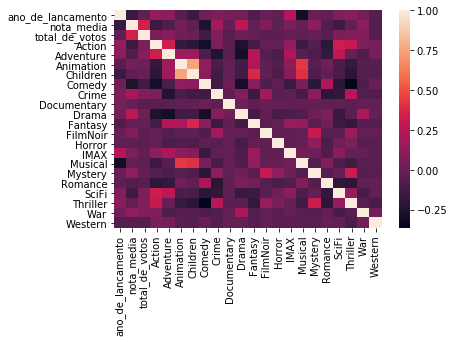

In [44]:
# solucao
filmes_nota_media = filmes
corr = filmes_nota_media.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
corr_top_media = corr['nota_media'].sort_values(ascending=False)[2:4]
corr_top_media

#Os gêneros com maiores valores de correlaçao com a nota média são Action(Ação) e Drama. 

## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

total_de_votos       1.000000
nota_media           0.342898
Adventure            0.104380
War                  0.087999
Thriller             0.085525
Crime                0.079766
Action               0.066239
SciFi                0.063802
Animation            0.023442
Drama                0.018779
Children             0.001764
Mystery             -0.007051
Fantasy             -0.009976
IMAX                -0.016285
Musical             -0.024741
ano_de_lancamento   -0.028709
Horror              -0.036132
FilmNoir            -0.039408
Romance             -0.045427
Documentary         -0.055010
Western             -0.060789
Comedy              -0.128527
Name: total_de_votos, dtype: float64

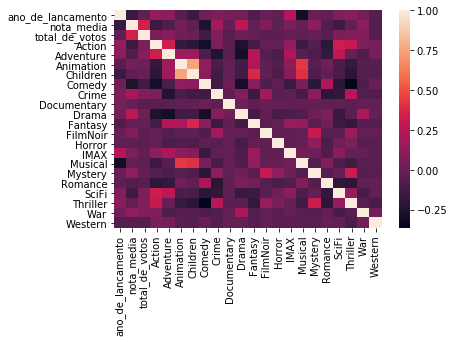

In [45]:
# solucao
filmes_total_de_votos = filmes
corr = filmes_total_de_votos.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
corr_total_de_votos = corr['total_de_votos'].sort_values(ascending=False)
corr_total_de_votos


#Os gêneros com maior valor de correlação com o total de votos são do tipo Adventure(Aventura) e 
# War(Guerra), os com menor valor são Wester(Faroeste) e Comedy(Comédia).

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

Text(0.5, 0, 'Ano de lançamento')

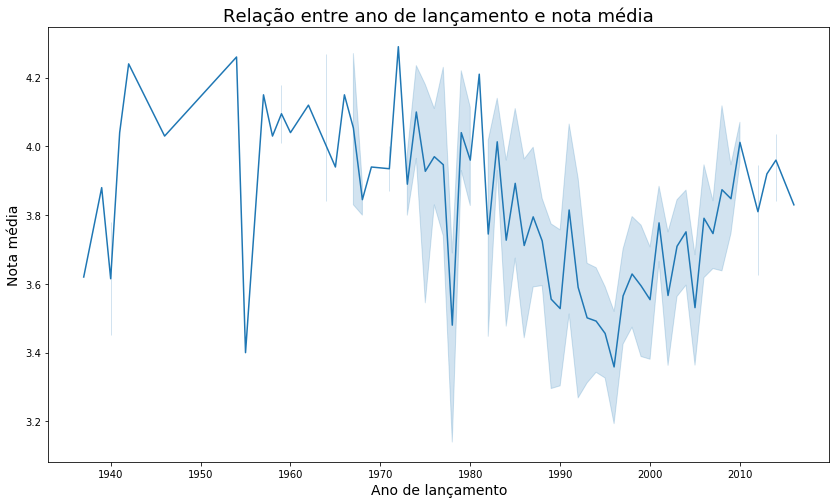

In [46]:
# solucao
plt.figure(figsize=(14,8))
ax = sns.lineplot(x='ano_de_lancamento', y = 'nota_media', data = filmes)
ax.set_title('Relação entre ano de lançamento e nota média', fontsize=18)
ax.set_ylabel('Nota média', fontsize=14)
ax.set_xlabel('Ano de lançamento', fontsize=14)

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159258
nota_media,-0.159258,1.000000


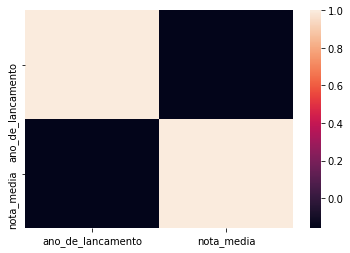

In [47]:
# solução (código)
filmes_ano_med = filmes
corr = filmes_ano_med[['ano_de_lancamento','nota_media']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
corr

### Solução (explicação)

A correlação dos dados de ano de lançamento e nota média é de natureza negativa, ou seja, quando uma variável tende a crescer a outra tende a diminuir. Assim dizer, poderíamos inferir que quanto mais novo o lançamento do filme, menor a nota média? Não, Correlação nao implica causalidade. Esse fato pode ocorrer dentre os fatores a implicitação de outras variáveis, essa implicitação pode ser responsável pelo que é chamado de correlação espúria, quando há a omissão de uma outra variável que causa alteração na variável 'ano_de_lançamento' ou 'nota_media', por exemplo. 

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

/home/mfretta/anaconda3/envs/pymf/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.015, 'Comparação e dispersão linear das variáveis')

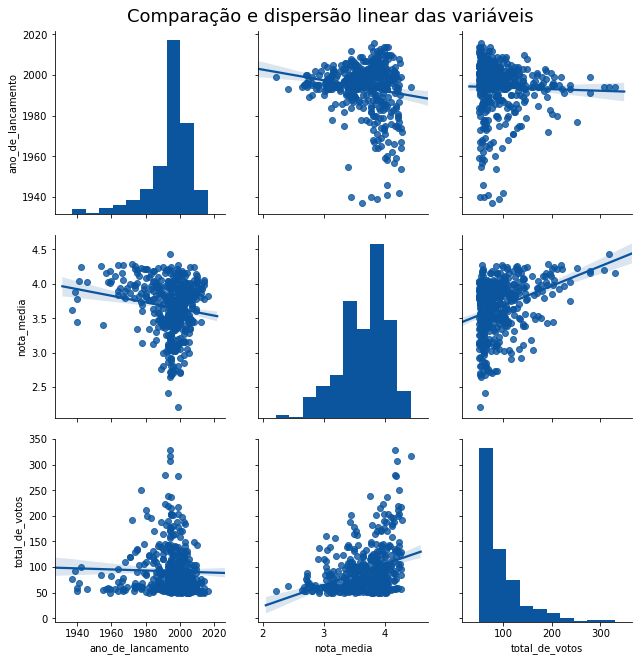

In [48]:
# solução
infos = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos']]
sns.set_palette('Blues_r')
ax = sns.pairplot(infos,kind='reg', size = 3)
ax.fig.suptitle('Comparação e dispersão linear das variáveis', fontsize=18, y=1.015)

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

Text(0.5, 1.015, 'Comparação e dispersão linear das variáveis')

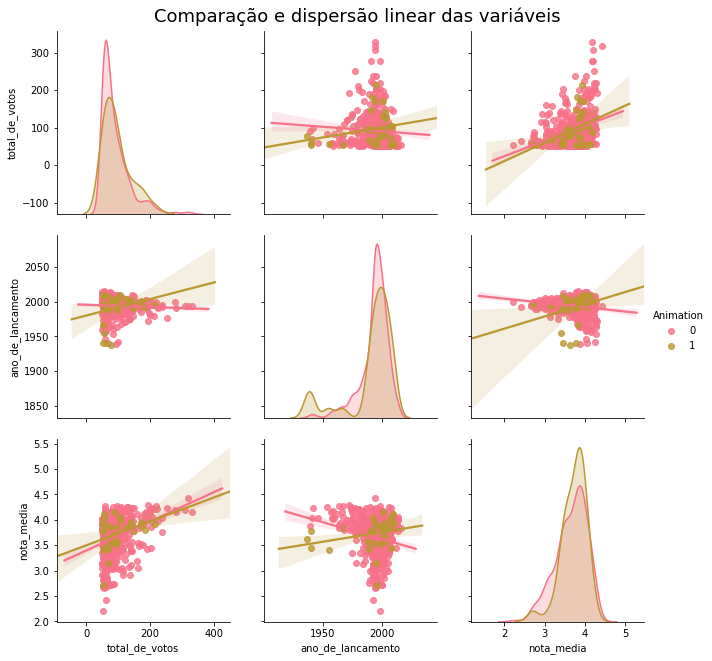

In [49]:
ax = sns.set_palette('husl')
ax = sns.pairplot(data = filmes, 
                  y_vars=['total_de_votos','ano_de_lancamento','nota_media'],
                  x_vars=['total_de_votos','ano_de_lancamento','nota_media'], 
                  hue = 'Animation',kind='reg',size = 3)
ax.fig.suptitle('Comparação e dispersão linear das variáveis', fontsize=18, y=1.015)


## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
Analisando as retas do modelo de regressão linear, sem maiores tratamentos nos dados, das notas médias em relação ao ano de lançamento dos filmes de animação, observa-se que há um tendência de maiores notas das avaliações para os filmes mais recentes. Essa correlação é baixa e, salvo algunas outliers que tendem a mudar a dispersão das notas, elas apresentam um certo grau de linearidade.
Em relação ao número total de votos para os filmes, em relação ao ano de lançamento dos mesmos, há uma tendência também linear, porém em uma distribuição que não apresenta normalidade. Essa distribuição apresenta um desenho de "explosão", ou seja, há uma maior concentração de menor número de votos e, no maior número de votos totais há pontos dispersos. Essa causa pode ser pelos fatores de números de filmes lançados mais recentemente, bem como tendência de avaliação de filmes mais recentes, assim como a quantidade de espectadores dos filmes mais recentes.
Para as outras categorias de filmes diferentes do gêneros animação, há um grau de linearidade nas votações, porém uma linearidade negativa, indicando menor tendência de avaliação nos filmes, bem como notas médias menores para os filmes mais recentes.



## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [87]:
# solução